# Scipy 2

## Interpolación (scipy.interpolate)	

La interpolación es el proceso de encontrar un valor entre dos puntos en una línea o una curva. La interpolación, no solo es útil en estadísticas, sino que también es útil en ciencia, negocios o cuando existe la necesidad de predecir valores que caen dentro de dos puntos de datos existentes.

__Ejemplo:__ Vamos a crear un conjunto de datos y luego vamos a hacer interpolaciones de varios tipos sobre ellos.

In [1]:
#%matplotlib inline

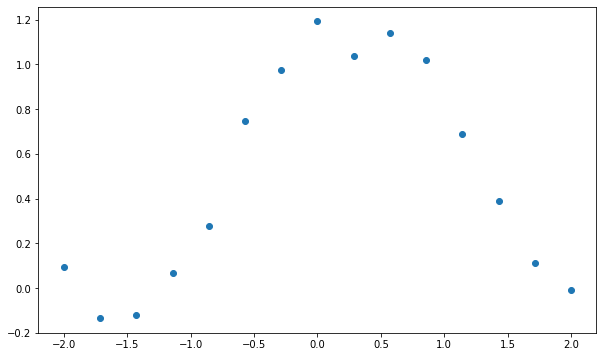

In [2]:
#Importamos los modulos necesarios
import numpy as np
import matplotlib.pyplot as plt

#Creamos un conjunto de datos
N=15
x = np.linspace(-2, 2, N)
y = np.exp(-x**4+x**3) + 0.1*np.random.randn(N)

# Grafiquemos
fig, ax = plt.subplots(figsize=(10, 6))

# los valores de x e y
ax.plot(x, y,'o')

plt.show()

### Interpolación 1-D

La clase `interp1d` en `scipy.interpolate` es un método conveniente para crear una función basada en puntos de datos fijos, que se pueden evaluar en cualquier lugar dentro del dominio definido por los datos dados mediante interpolación de tipo  `‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’`.

Al utilizar los datos anteriores, creemos una función de interpolación lineal y cubica y dibujemos un nuevo gráfico interpolado.

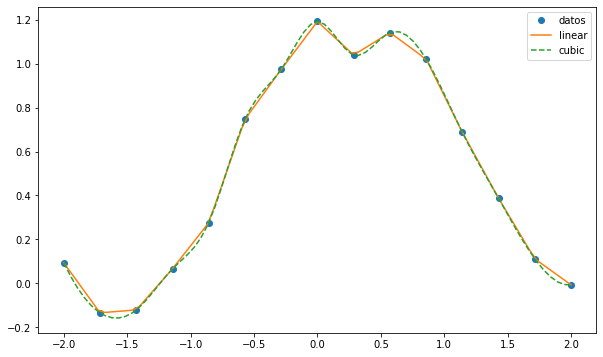

In [3]:
#importamos la funcion interp1d
from scipy.interpolate import interp1d
f1 = interp1d(x, y,kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')

#Ahora grafiquemos
fig1, ax1 = plt.subplots(figsize=(10, 6))
#Primero debo de crear un arreglo lienal para plotear las funciones f1 y f2
#Con el mismo rango pero mas puntos para que se vea suave
xlin = np.linspace(-2,2,5*N)

# los valores de x e y
ax1.plot(x, y,'o')
# los valores de xlin y f1
ax1.plot(xlin, f1(xlin),'-')
# los valores de xlin y f2
ax1.plot(xlin, f2(xlin),'--')
#Creamos una leyenda para que la grafica se entienda
plt.legend(['datos', 'linear', 'cubic'], loc = 'best')
plt.show()

### Splines

Para dibujar curvas suaves a través de puntos de datos, los dibujantes usan tiras delgadas y flexibles algun material llamadas _Splines_ mecánicas. 

#### Spline univariante
La spline de suavizado unidimensional se ajusta a un conjunto determinado de puntos de datos. La clase `UnivariateSpline` en `scipy.interpolate` es un método conveniente para crear una función, basada en la clase de puntos de datos fijos, la sintaxis es la siguiente

>```scipy.interpolate.UnivariateSpline (x, y, w = None, bbox = [None, None], k = 3, s = Ninguno, ext = 0, check_finite = False)```

__Parámetros:__ 

`W`: especifica los pesos para el ajuste. Debe ser positivo. Si no hay ninguno (predeterminado), todos los pesos son iguales.

`S`: especifica el número de puntos especificando una condición de suavizado.

`K`: grado de suavizado de spline. Debe ser $<= 5$. El valor predeterminado es $k = 3$, una spline cúbica.

`Ext`: controla el modo de extrapolación de los elementos que no están en el intervalo definido por la secuencia de puntos.

* si ext = 0 o "extrapolar", devuelve el valor extrapolado.
* si ext = 1 o "cero", devuelve 0
* si ext = 2 o 'raise', genera un ValueError
* si ext = 3 de "const", devuelve el valor de límite.

`check_finite`: si se debe verificar que las matrices de entrada contienen solo números finitos.

__Ejemplo:__ Utilicemos la función gaussiana pero introduciendo una gran amplitud en el ruido

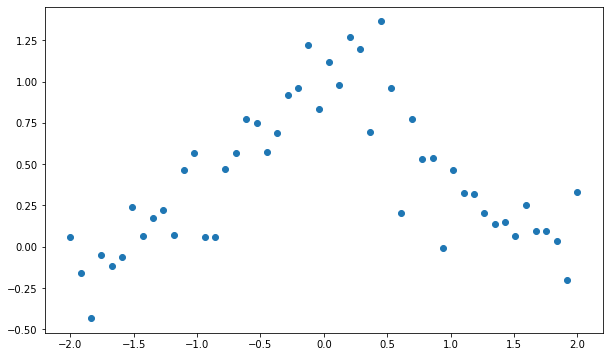

In [4]:
#Importamos los modulos necesarios
import numpy as np
import matplotlib.pyplot as plt

#Creamos un conjunto de datos
N=50
x = np.linspace(-2, 2, N)
y = np.exp(-x**2) + 0.2*np.random.randn(N)

# Grafiquemos
fig2, ax2 = plt.subplots(figsize=(10, 6))
# los valores de x e y
ax2.plot(x, y,'o')
plt.show()

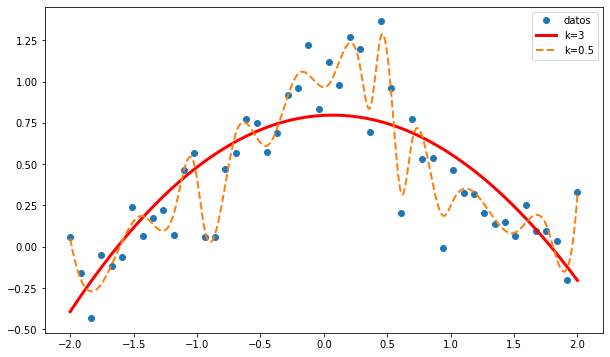

In [5]:
from scipy.interpolate import UnivariateSpline
#Usando los valores por defecto de spline para interpolar los puntos
spl = UnivariateSpline(x, y)
#Creo un arreglo lienal para plotear las funciones
xs = np.linspace(-2, 2, N*100)
#Grafico sobre el anterior
fig3, ax3 = plt.subplots(figsize=(10, 6))
# los valores de x e y
ax3.plot(x, y,'o')
# UnivariateSpline
ax3.plot(xs, spl(xs), 'r', lw = 3)
#Ahora cambiando los valores de k
spl.set_smoothing_factor(0.5)
ax3.plot(xs, spl(xs), '--',linewidth=2)
#Creamos una leyenda
plt.legend(['datos', 'k=3', 'k=0.5'], loc = 'best')
plt.show()

### Interpolador en 2D

El modulo `scipy.interpolate` también contiene un interpolador de funciones en 2D llamado `scipy.interpolate.griddata`. Cuya sintaxis es la siguiente

>``` scipy.interpolate.griddata(points, values, xi, method='linear', fill_value=nan, rescale=False)```

donde `xi` son un arreglo 2-D de flots, que son los puntos en los que interpolar datos.

__Ejemplo 2:__ Inspirado en un ejemplo de *scipython* Segunda edición

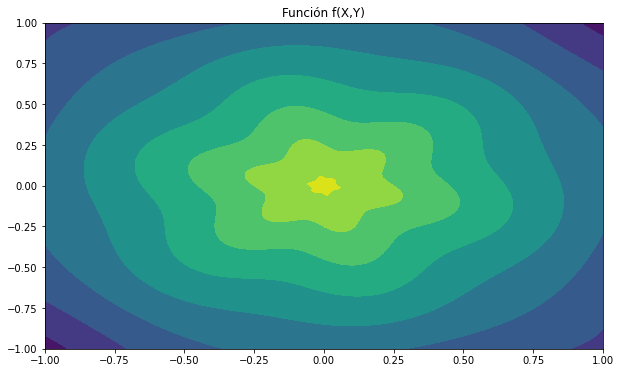

In [6]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Creo los puntos de muestreo en el eje x e y
x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
#Creo matrices de coordenadas a partir de vectores de coordenadas
X, Y = np.meshgrid(x,y)

# Creo una funcion modelo en dos dimensiones
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

# Evaluo los puntos del grid en la funcion del modelo
T = f(X, Y)
# Grafico la funcion
fig0, ax0 = plt.subplots(figsize=(10, 6))
# Plot the model function and the randomly selected sample points
ax0.contourf(X, Y, T)
ax0.set_title('Función f(X,Y)')
plt.show()

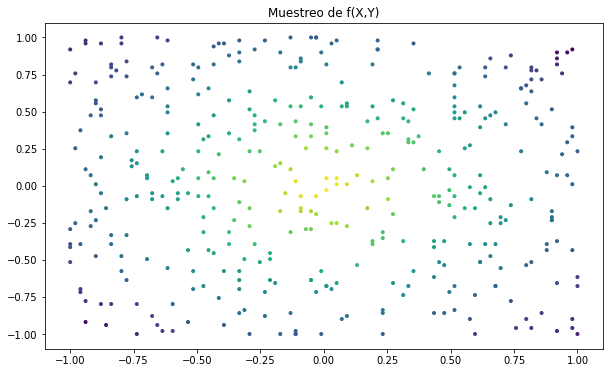

In [7]:
# Ahora voy a escojer puntos aleatorios del dominio de la funcion del modelo
#Numero de puntos
npts = 400
#random.choice escoje del conjunto x (o y) un npts aleatorio
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

#Graficamos estos puntos
fig1, ax1 = plt.subplots(figsize=(10, 6))
# el color se selecciona usando la funcion del modelo
ax1.scatter(px, py, c=f(px, py), marker='.')
ax1.set_title('Muestreo de f(X,Y)')
plt.show()

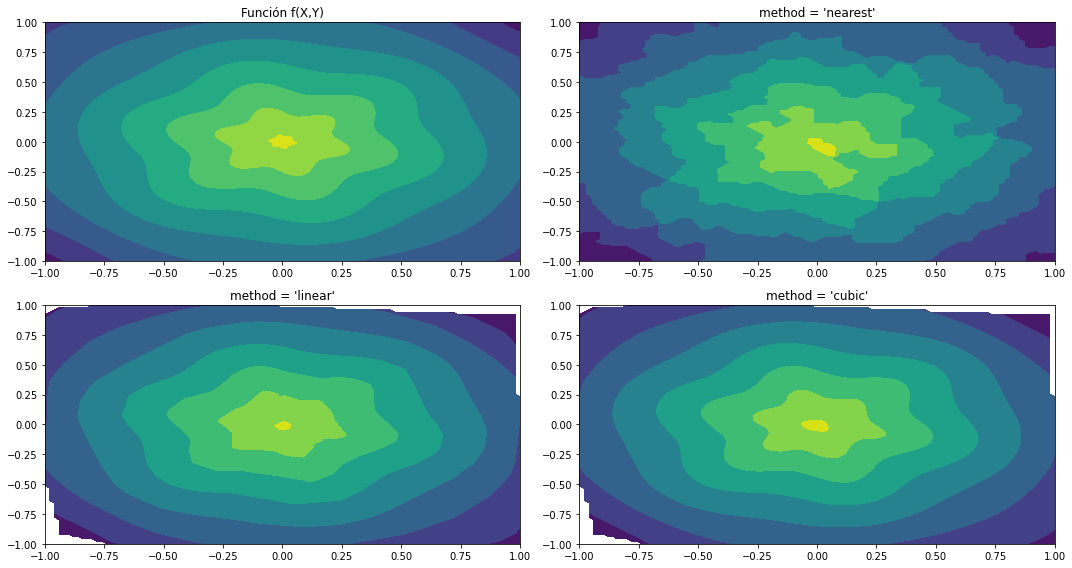

In [8]:
#Creamos los subplots para graficar
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 8))
#Usando un for vamos a interpolar usando los tres diferentes metodos y graficamos
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    #Para producir los indices de los subplots
    r, c = (i+1) // 2, (i+1) % 2
    #Grafico
    ax[r,c].contourf(X, Y, Ti)
    #Pongo los titulos
    ax[r,c].set_title("method = '{}'".format(method))

#En el primer subplot pongo la funcion original
ax[0,0].contourf(X, Y, T)
ax[0,0].set_title('Función f(X,Y)')

plt.tight_layout()
plt.show()

## Optimización (scipy.optimize)	

El paquete `scipy.optimize` proporciona una gama de algoritmos para la minimización de funciones multidimensionales (con o sin restricciones adicionales), mínimos cuadrados, ajuste de datos y raíces de ecuaciones multidimensionales. 

Debe tenerse en cuenta que la mejor elección de algoritmo dependerá de la función individual que se esté analizando. Para una función arbitraria, no hay garantía de que un método particular converja sobre el mínimo deseado, o que si lo hace lo hará rápidamente. Del mismo modo, podría esperar (pero no puede garantízar) que la mayoría de los buscadores de raíces numéricos devuelven la raíz "más cercana" a la estimación inicial.

Las rutinas de optimización de `SciPy.minimizan` una función de una o más variables, $f(x_1, x_2, . . . , x_n)$. Para encontrar el máximo, se determina el mínimo de $−f(x_1, x_2,..., X_n)$.
Algunos de los algoritmos de minimización solo requieren que se evalúe la función en sí; otros requieren su primera derivada con respecto a cada una de las variables en una matriz conocida como el *jacobiano*.

Algunos algoritmos intentarán estimar el *jacobiano* numéricamente, si no lo puede calcular, se pide como una función separada. Además, algunos algoritmos de optimización sofisticados requieren información sobre las segundas derivadas de la función, una matriz simétrica de valores llamada *hessiana*

### Minimización sin restricciones
El algoritmo general para la minimización de funciones escalares multivariantes es `scipy.optimize.minimize`, que toma dos argumentos obligatorios
 
 __Sintaxis:__
  >
  > $minimize(fun, x0, ...)$

El primero objeto $fun$, es la función a minimizar: ésta función debe tomar una arreglo de valores, $x$, definiendo el punto en el que se va a evaluar $(x_1, x_2,..., x_n)$ seguido de los argumentos adicionales que requiera en el caso espesífico. El segundo argumento requerido, $x0$, es un arreglo de valores que representan la suposición inicial para el algoritmo de minimización comience.

Los diferentes métodos para minimizar que usa `minimize`

| método 	| Descripción 	|
|-	|-	|
| BFGS 	| Algoritmo Broyden – Fletcher – Goldfarb – Shanno (BFGS) 	|
| Nelder-Mead 	| Algoritmo de Nelder-Mead, también conocido como simplex cuesta abajo o método ameba, no se necesitan derivados 	|
| CG 	| Método de gradiente conjugado 	|
| Powell 	| Método de Powell (no se necesitan derivadas con este algoritmo) 	|
| dogleg 	| Algoritmo de región de confianza dogleg (minimización sin restricciones); requiere el Jacobiano y el Hessiano (que debe ser positivo-definido) 	|
| TNC 	| Algoritmo Truncated Newton para minimización dentro de límites 	|
| l-bfgs-b 	| Bound-constrained minimization 	|
| slsqp 	| “Sequential least-squares programming” para la minimización con límites y restricciones de igualdad y desigualdad 	|
| cobyla 	| “Constrained optimization by linear approximation” minimización restringida por aproximación lineal 	|

__Ejemplo:__ la función de Himmelblau, es una función bidimensional simple con algunas que la convierten en una buena
función de prueba para algoritmos de optimización. La función de Himmelblau es
$$f(x, y) = (x^2 + y − 11)^2 + (x + y^2 − 7)^2 $$

Lo primero es graficar para tener una idea del comportamiento:

In [9]:
#Defino la función en la forma correcta, para ingresarla en el minimize
def Himmelblau(X):
    """Funcion de Himmelblau"""
    x, y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

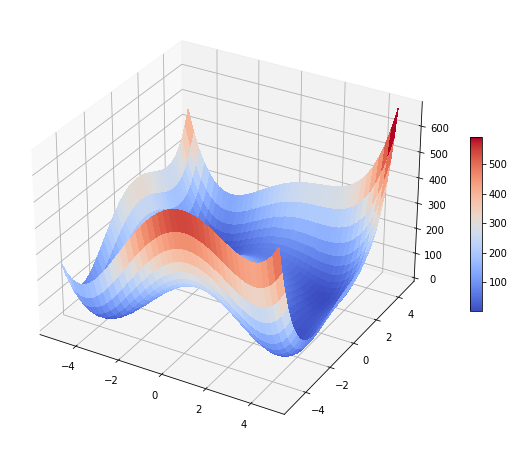

In [10]:
#Importo los módulos necesarios 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

#Creo la figura y el axis
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={"projection": "3d"})

# ahora defino los intervalos en x e y.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = Himmelblau([X,Y])

# Grafico la superficie.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Pongo la barra de colores que indica los valores.
fig.colorbar(surf, shrink=0.4, aspect=15)

plt.show()

De la gráfica se nota que hay varios mímimos en el rango que estanos explorando. Podemos hacer una grafica de contorno, para ver donde están localizados:

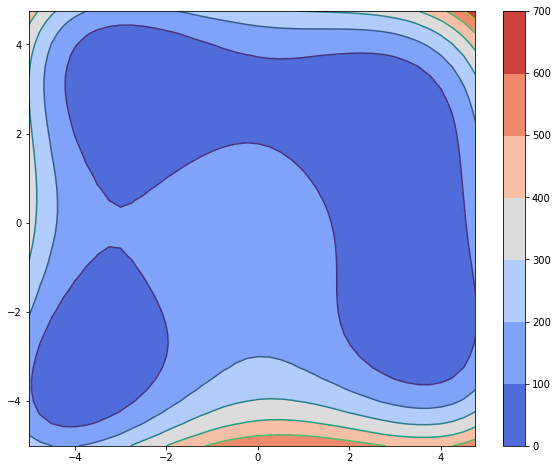

In [11]:
#Importo los módulos necesarios 
import matplotlib.pyplot as plt
import numpy as np

#Creo la figura y el axis
fig, ax = plt.subplots(figsize=(10,8))

ax.contour(X, Y, Z)
sup = ax.contourf(X, Y, Z,cmap=cm.coolwarm)
# Pongo la barra de colores que indica los valores.
fig.colorbar(sup, shrink=1, aspect=20)
plt.show()

Vemos entonces que hay al menos 4 mimimos locales en el rango de estudio: Al rededor de los puntos $(3, 2)$, $(−3, 3)$, $(−4, −3)$ y $(4, −2)$. Para encontrar un mínimo, llamamos a `minimize` con la suposición inicial $(x, y) = (0, 0)$

In [12]:
# Cargo la función minimize del módulo scipy.optimize
from scipy.optimize import minimize
#Ahora minimizo la función
diccionario = minimize(Himmelblau, (0, 0))
print(diccionario)

      fun: 1.3782261326630835e-13
 hess_inv: array([[ 0.01578229, -0.0094806 ],
       [-0.0094806 ,  0.03494937]])
      jac: array([-3.95019832e-06, -1.19075542e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 10
     njev: 16
   status: 0
  success: True
        x: array([2.99999994, 1.99999999])


`minimize` devuelve un objeto diccionario con información sobre la minimización (Los campos importantes se describen en la tabla abajo).
Si la minimización tiene éxito, el mínimo aparece como _x_. El algoritmo que utilizará `minimize` se especifica en los argumentos, el algoritmo predeterminado es BFGS, es un buen método general tipo cuasi-Newton.

| Llave 	| Descripción 	|
|-	|-	|
| success 	| éxito Un valor booleano que indica si la minimización fue exitoso 	|
| x 	| Si tiene éxito, la solución: los valores de (x1, x2,..., xn) en los quela función es mínima; si el algoritmo no tuvo éxito, xindica el punto en el que se rindió 	|
| fun 	| Si tiene éxito, el valor de la función en el mínimo identificado como x  	|
| message 	| Una cadena que describe el resultado de la minimización. 	|
| Jac 	| El valor del jacobiano: si la minimización tiene éxito, los valores en esta matriz debe estar cerca de cero hess 	|
| hess, hess_inv 	| El Hessiano y su inverso (si se usa)  El número de evaluaciones de la función, su jacobiano y su Hessiano 	|
| nfev, njev, nhev 	| El número de evaluaciones de la función, su Jacobiano y su Hessiano. 	|

__Ejemplo 2:__ para maximizar, se minimiza $-f(x)$

In [13]:
#Creo una función lamnda que es el negativo de Himmelblau
lessHimmelblau = lambda X: -Himmelblau(X)
minimize(lessHimmelblau , (0.1 , -0.2))

      fun: -8122685219740.447
 hess_inv: array([[0.03043408, 0.00669823],
       [0.00669823, 0.00147411]])
      jac: array([-3.85738342e+09,  1.75265546e+10])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 351
      nit: 2
     njev: 113
   status: 2
  success: False
        x: array([  988.07169246, -1636.22149234])

Note que comenzando en $(0.1, −0.2)$, el algoritmo BFGS ha subido por uno de los lados empinados de la función Himmelblau y no pudo converger. Desafortunadamente, en este caso el algoritmo no sabe que falló y devolvió `True` en la etiqueta de éxito.

Es posible que tenga o no un error en mensaje (dependiendo de la configuración precisa de su sistema): _error deseado no necesariamente logrado debido a pérdida de precisión_.
  >message: 'Desired error not necessarily achieved due to precision loss.' 
  
De hecho, tenemos que empezar bastante cerca de el máximo para estar seguro del éxito, esa es la razón por la cual es deseable primero graficar las funciones: sabemos que el mínimo (máximo) de la función de Himmelblau, está cerca a $(-0.2,-1)$

In [14]:
minimize(lessHimmelblau , ( -0.2 , -1))

      fun: -181.61652152258267
 hess_inv: array([[ 0.02312334, -0.0065379 ],
       [-0.0065379 ,  0.06119262]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-0.27084461, -0.9230386 ])

Muchas veces la gráfica no va a ser de ayuda (o no va a ser posible en más de 3 dimensiones). Podemos tratar en este caso, otro de los métodos disponibles en `minimize`, con el mismo punto que fallo antes $(0.1 , -0.2)$

In [15]:
minimize(lessHimmelblau , (0.1 , -0.2), method='Nelder-Mead')

 final_simplex: (array([[-0.27087419, -0.9230486 ],
       [-0.27089208, -0.92298798],
       [-0.27077447, -0.92304541]]), array([-181.6165215 , -181.61652146, -181.61652141]))
           fun: -181.61652150067573
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 39
        status: 0
       success: True
             x: array([-0.27087419, -0.9230486 ])

El algoritmo de `Nelder-Mead` es un método simple que no necesita de estimar las derivadas de la función, por lo que no tiene la tendencia a subir por los lados empinados de la función. Por otro lado note que se han necesitado 77 evaluaciones de funciones para que converger en el máximo local, contrastadas con las 24 con la ejecución anterior (no es muy relevante en pocas dimensiones).

__Ejemplo 3:__ considere el método `dogleg`, que requiere para minimizar que se le pasen la función su jacobiano y su hessiano. Para la función de Himmelblau se tiene

In [16]:
def DHimmelblau(X):
    """Jacobiano de la funcion de Himmelblau"""
    x, y = X
    f1 = x**2 + y - 11
    f2 = x + y**2 - 7
    dfdx = 4*x*f1 + 2*f2
    dfdy = 2*f1 + 4*y*f2
    return np.array ([dfdx , dfdy ])

def DDHimmelblau(X):
    """Hessiano de la funcion de Himmelblau"""
    x, y = X
    d2fdx2 = 12*x**2 + 4*y - 42
    d2fdy2 = 12*y**2 + 4*x - 26
    d2fdxdy = 4*(x + y)
    return np.array ([[ d2fdx2 , d2fdxdy], [d2fdxdy , d2fdy2 ]])
#Como lo que estamos buscando es el maximo, usamos las negativas del Jacobiano  Hessiano
lessDHimmelblau = lambda X: -DHimmelblau(X)
lessDDHimmelblau = lambda X: -DDHimmelblau(X)

In [17]:
 #Se pasan el jacobiano  el Hessiano usando las etiquetas o flags jac y hess
maximundic = minimize(lessHimmelblau , (0, 0), jac=lessDHimmelblau , hess=lessDDHimmelblau , method='dogleg')
print(maximundic)

     fun: -181.6165215225827
    hess: array([[44.81187272,  4.77553259],
       [ 4.77553259, 16.85937624]])
     jac: array([-1.26922473e-10,  1.23685240e-09])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 4
     nit: 4
    njev: 5
  status: 0
 success: True
       x: array([-0.27084459, -0.92303856])


El algoritmo ha convergido con éxito en el máximo local en cinco evaluaciones de la funcion `eval`, cinco evaluaciones del jacobiano y cuatro evaluaciones del hessiano.

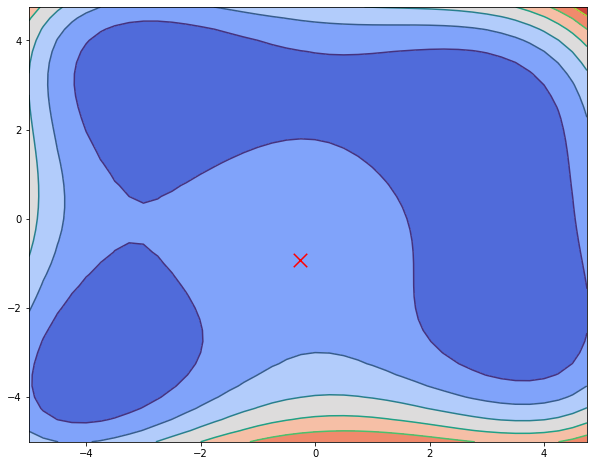

In [18]:
#Importo los módulos necesarios 
import matplotlib.pyplot as plt
import numpy as np

#Creo la figura y el axis
fig1, ax1 = plt.subplots(figsize=(10,8))
#Grafico el contorno
ax1.contour(X, Y, Z)
sup1 = ax1.contourf(X, Y, Z,cmap=cm.coolwarm)
#Grafico el punto del máximo
ax1.scatter(maximundic["x"][0], maximundic["x"][1], -maximundic["fun"], c="red",marker="x")
# Pongo la barra de colores que indica los valores.
fig.colorbar(sup1, shrink=1, aspect=20)


plt.show()

## Ajuste no lineal por mínimos cuadrados
La rutina general de ajuste no lineales por mínimos cuadrados de _SciPy_ es `scipy.optimize.leastsq`, cuya sintaxis más básica es:
  >$scipy.optimize.leastsq (func, x0, args = ())$.

Esto intentará ajustar una secuencia de puntos de datos, $y$, a una función modelo, $f$, que depende de uno o más parámetros de ajuste. A `leastsq` se le pasa un objeto función `func`, y devuelve la diferencia entre $y$(puntos de datos) y $f$ llamados los residuos. `menosq` también requiere un estimación inicial de los parámetros ajustados, $x0$. Si $func$ requiere otros argumentos (normalmente,
arreglos de datos, $y$, y una o más variables independientes), páselos en la secuencia argumentos $args$.

__Ejemplo:__ 

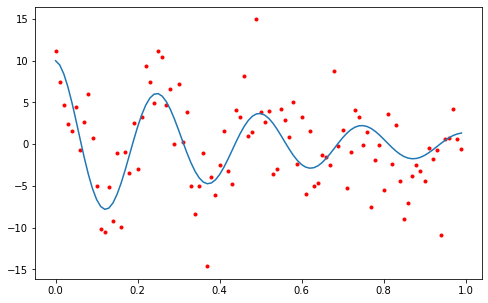

In [19]:
import numpy as np
import matplotlib .pyplot as plt

#Amplitud
A = 10
#Frecuencia
freq = 4
#Tiempo medio
tau = 0.5
def f(t, A, freq , tau ):
    return A * np.exp(-t/tau) * np.cos (2* np.pi * freq * t)

#Tiempo maximo
tmax = 1
#incremento
dt = 0.01
# Arreglo de tiempo
t = np.arange (0, tmax , dt)
#Funcion exacta
yexact = f(t, A, freq , tau)
#Le sumo ruido
y = yexact + np.random.randn(len(yexact ))*4

#Creo la figura y el axis
fig2, ax2 = plt.subplots(figsize=(8,5))
ax2.plot(t, yexact)
ax2.scatter(t, y, marker=".",c="red")
plt.show ()

Para ajustar estos datos a los parámetros $A$, $freq$ y $tau$ (fingiendo que no los conocemos), primero definimos nuestra función de residuos,  usamos `leastsq` para encontrar los parámetros que mejor ajusten los datos $y$ a la función $f$.

In [20]:
def residuals (p, y, t):
    """Funcion de residuos, evalua que tan lejos esta la funcion 'f' evaluada en los parametros 'p'
    respecto a un punto 'y' en un tiempo 't'"""
    A, freq , tau = p
    return y - f(t, A, freq , tau)


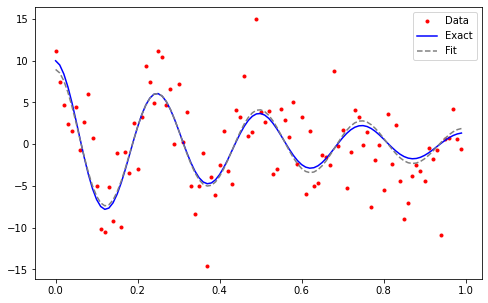

In [21]:
#Importamos la función leastsq
from scipy.optimize import leastsq
#Punto inicial
p0 = 5, 5, 1
#Le pasamos 
plsq = leastsq(residuals , p0 , args =(y, t))

#Creo la figura y el axis
fig2, ax2 = plt.subplots(figsize=(8,5))
ax2.plot(t, y, '.', c='r', label='Data')
ax2.plot(t, yexact , c='b', label='Exact')
pfit = plsq[0]
#Aquí hay un truco MUY IMPORTANTE, la función 'f', se le entregan
# los parámetros t, A, freq y tau, en este caso le entregamos la estructura
# pfit, pero le debemos de indicar al código que debe de desempaquetarla
# utilizando el operador '*', asi:
ax2.plot(t, f(t, *pfit),'--', c='gray', label='Fit')
ax2.legend()
plt.show()

SciPy también incluye una función de ajuste de curvas, `scipy.optimize.curve_fit`, que puede ajustar datos a una función directamente (sin la necesidad de una función adicional para calcular el residuo) y soporta el ajuste de mínimos cuadrados ponderados. La sintaxis es:
  
  >$curve\_fit(f, xdata, ydata, p0, sigma, absolute\_sigma)$

donde $f$ es la función que se ajusta a los datos $(xdata, ydata)$. $p0$ es la suposición inicial para los parámetros y $sigma$, si se proporcionan, dan los pesos de los valores de $ydata$. Si $absoluto_sigma$ es Verdadero, estos se tratan como un error de desviación estándar (es decir, pesos absolutos); el valor predeterminado, $absolute\_sigma$ = `False`, los trata como pesos relativos.
La función `curve_fit` devuelve `popt`, que son los mejores valores para el ajuste de los parámetros y `pcov`, que es la matriz de covarianza de los parámetros.

__Ejemplo:__ Ajustamos la función " Lorentzian line shape" centrada en $x0$ con un HWHM (Full width at half maximum) de $\gamma$ y una amplitud $A$

$$f(x) = \frac{A\gamma^2}{\gamma^2 +(x-x_0)^2}$$

Como en el ejemplo anterior vamos a agregar algunos datos de ruido artificiales para dar la apariencia de datos reales. Los parámetros `ft` son $A$, $\gamma$ y $x0$. 

In [22]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib .pyplot as plt
#Uso el concepto de desempaquetado
# Parametros
x0 , A, gamma = 12, 3, 5
#Numero de puntos a graficar
n = 200
#Vector de pesos
sigma = np.ones(n)*0.5
# Rango de ajuste
x = np.linspace (1, 20, n)
#Calculo la funcion exacta
yexact = A * gamma **2 / (gamma **2 + (x-x0 )**2)
# Agreguo un poco de ruido con un sigma de 0.5 además de una región mas ruidosa
# en la vecindad de x0 donde sigma es 3.
sigma[np.abs(x-x0 +1) <1] = 3
noise = np.random.randn(n) * sigma
y = yexact + noise

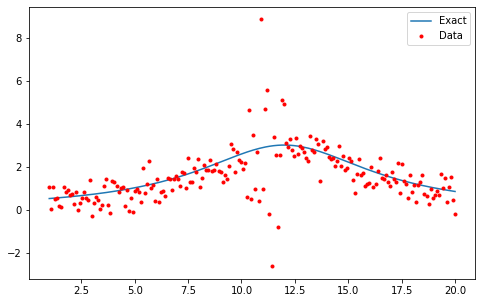

In [23]:
#vemos como quedaron los datos
#Creo la figura y el axis
fig3, ax3 = plt.subplots(figsize=(8,5))
ax3.plot(x, yexact , label='Exact')
ax3.plot(x, y, '.', c='r', label='Data')
ax3.legend()
plt.show()

In [24]:
#Ahora defino las funciones para ajustar y para calcular el valo
def f(x, x0 , A, gamma):
    """ función " Lorentzian line shape" centrada en 'x0' con un HWHM 'gamma'
    y una amplitud A"""
    return A *gamma **2 / (gamma **2 + (x-x0 )**2)
def rms(y, yfit):
    """Root mean square, para medir la bondad del ajuste"""
    return np.sqrt(np.sum((y-yfit )**2))

# Primero se hace el ajuste sin pesos.
# Parametros inicales (gess)
p0 = 10, 4, 2
# Llamo la funcion curve_fit
popt , pcov = curve_fit(f, x, y, p0)
# Uso los valores encontrados 
yfit = f(x, *popt)
print('Parametros de ajuste (sin pesos): ', popt)
print('Matris de Covarianza (sin pesos):\n', pcov)
print('Error rms del ajuste (sin pesos): ', rms(yexact , yfit ))
print()
# Ajuste con pesos absolutos
popt2 , pcov2 = curve_fit (f, x, y, p0 , sigma=sigma , absolute_sigma =True)
yfit2 = f(x, *popt2)
print('Parametros de ajuste (con pesos): ', popt2)
print('Matris de Covarianza (con pesos):\n',pcov2)
print('Error rms del ajuste (con pesos): ', rms(yexact , yfit2 ))

Parametros de ajuste (sin pesos):  [12.16460863  2.79825921  4.73669106]
Matris de Covarianza (sin pesos):
 [[ 0.06761719 -0.00104913  0.00642319]
 [-0.00104913  0.02410499 -0.0471066 ]
 [ 0.00642319 -0.0471066   0.18027772]]
Error rms del ajuste (sin pesos):  2.5321002424631347

Parametros de ajuste (con pesos):  [12.06215509  2.91236007  4.55617144]
Matris de Covarianza (con pesos):
 [[ 0.02004428 -0.00396912  0.00698288]
 [-0.00396912  0.01261331 -0.02141308]
 [ 0.00698288 -0.02141308  0.05825381]]
Error rms del ajuste (con pesos):  2.108451834017464


Ahora vamos a graficar los puntos de los datos, la curva teorica y las dos curvas encontradas con la técnica de ajuste

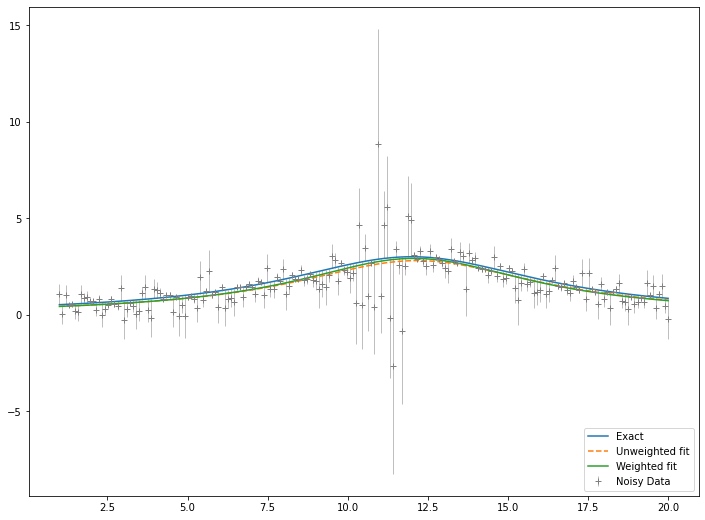

In [29]:
fig3, ax3 = plt.subplots(figsize=(12,9))
ax3.plot(x, yexact , label='Exact')
#Ponemos baras de error en los puntos, usando el 
# vector de ruido que generamos previamente
ax3.errorbar(x, y, yerr=noise , elinewidth =0.5 , c='0.5', marker='+',
                lw=0, label='Noisy Data')
#Sin peso
ax3.plot(x, yfit , "--",label='Unweighted fit')
#Con peso
ax3.plot(x, yfit2 , label='Weighted fit')
#La leyenda
ax3.legend(loc='lower right')
plt.show()

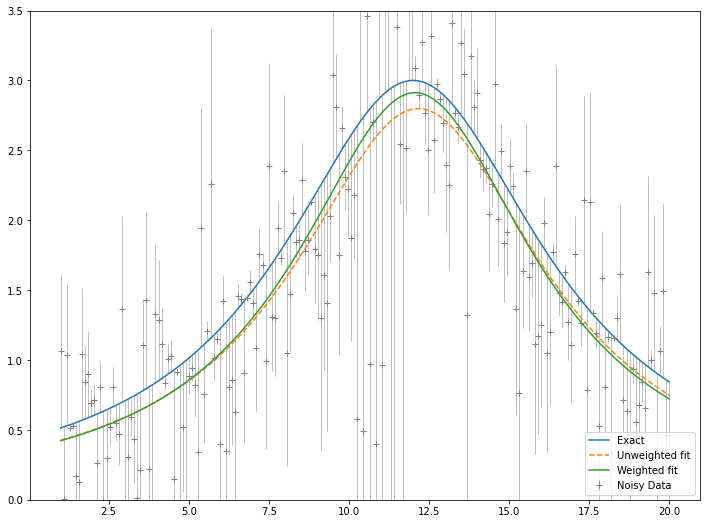

In [30]:
#Para volver a mostrar la imagen
from IPython.display import display
# Para que se vea mejor acoto el dominio
prop = {'ylim': (0, 3.5)}
#Actualizo las propiedades
ax3.update(prop)
display(fig3)